In [1]:
#purpose model mag uncertainty for point sources in the PANDAS survey
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
df=pd.read_csv('/users/caganze/result_w9sh32lw5il5lpfl.tsv', sep='\t')

In [3]:
df=df[np.logical_and.reduce([df.g.values <27,\
                     df.i.values<27,
                     df.i.values >17, 
                    df.g.values >17])].reset_index(drop=True)

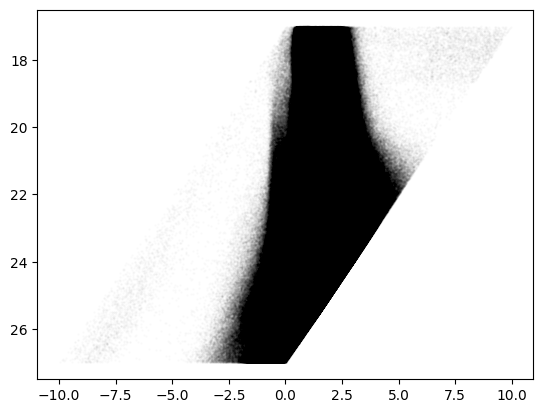

In [4]:
fig, ax=plt.subplots()
ax.scatter(df.g-df.i, df.i, s=1, alpha=0.01, c='k')
ax.invert_yaxis()

In [5]:
def power_law(x, alpha):
    return (x-25)**alpha

In [6]:
nans= np.logical_or(np.isnan(df.g.values), np.isnan(df.g.values))

In [7]:
pol=np.poly1d(np.polyfit(df.g.values, np.log10(df.dg).values, 1))
pol_i=np.poly1d(np.polyfit(df.i.values, np.log10(df.di).values, 1))

In [8]:

#param, param_cov = curve_fit(power_law, df.g.values[~nans], df.dg.values[~nans],
#                              p0=(3), bounds=(0, 10), method ='dogbox')

In [9]:
pol

poly1d([ 0.31726736, -8.96763495])

In [10]:
xgrid=np.linspace(15, 27, 100)

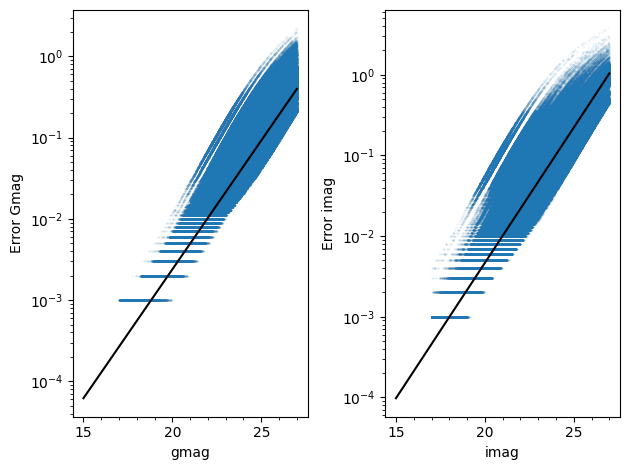

In [11]:
fig, ax=plt.subplots(ncols=2)
ax[0].scatter(df.g, df.dg, s=.1, alpha=0.1)
ax[0].plot(xgrid, 10**pol(xgrid), c='k')
#ax.plot(xgrid, (xgrid-25)**0.5, c='r', label='powerlaw')

ax[1].scatter(df.i, df.di, s=.1, alpha=0.1)
ax[1].plot(xgrid, 10**pol_i(xgrid), c='k', label='polynomial')

ax[0].set(ylabel='Error Gmag', xlabel='gmag', yscale='log')
ax[1].set(ylabel='Error imag', xlabel='imag', yscale='log')
#ax[1].axvline(25.5)
ax[0].minorticks_on()
ax[1].minorticks_on()
plt.tight_layout()
plt.savefig('../figures/mag_error_fits.jpeg')